# Index objects

In [9]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [3]:
index = serie.index
index

Index(['a', 'b', 'c'], dtype='object')

In [4]:
index[1:]

Index(['b', 'c'], dtype='object')

In [10]:
index = pd.Index(np.arange(3))
index

Int64Index([0, 1, 2], dtype='int64')

In [12]:
serie2 = Series([1.5, -2.5, 0],index = index)
serie2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [13]:
serie2.index is index

True

In [14]:
serie = Series([4.5, 7.2, -5.3, 3.6], index = ['d', 'b', 'a', 'c'])
serie

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [15]:
serie2 = serie.reindex(['a','b', 'c', 'd', 'e'])
serie2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [16]:
serie.reindex(['a','b', 'c', 'd', 'e'], fill_value = 0)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

In [17]:
serie3 = Series(['blue', 'purple', 'yellow'], index = [0, 2, 4])
serie3

0      blue
2    purple
4    yellow
dtype: object

In [19]:
serie3.reindex(range(6), method ='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [23]:
frame = DataFrame(np.arange(9).reshape((3,3)), index = ['a', 'c', 'd'], columns = ['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [24]:
frame2 = frame.reindex(['a','b','c','d'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [25]:
states = ['Texas', 'Utah', 'California']
frame = frame.reindex(columns = states)
frame

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [26]:
frame.reindex(index = ['a','b','c','d'], method = 'ffill')

,Texas,Utah,California
a,1,NaN,2
b,1,NaN,2
c,4,NaN,5
d,7,NaN,8


## Dropping entries from an axis

In [27]:
serie = Series(np.arange(5.), index = ['a','b','c','d','e'])
serie

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [29]:
new_serie = serie.drop('c')
new_serie

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [30]:
serie.drop(['d','c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [31]:
data = DataFrame(np.arange(16).reshape((4,4)),
                index = ['Ohio', 'Colorado', 'Utah', 'NY'],
                columns = ['one','two','three','four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
NY,12,13,14,15


In [32]:
data.drop(['Colorado','Ohio'])

,one,two,three,four
Utah,8,9,10,11
NY,12,13,14,15


In [35]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
NY,12,14,15


In [36]:
data.drop(['two', 'four'], axis=1)

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
NY,12,14


## Indexing, selection and filtering

In [37]:
serie = Series(np.arange(4.), index=['a','b','c','d'])
serie

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [38]:
serie['b']

1.0

In [39]:
serie[2:4]

c    2.0
d    3.0
dtype: float64

In [40]:
serie[['b','d']]

b    1.0
d    3.0
dtype: float64

In [41]:
serie['b':'c'] = 10
serie

a     0.0
b    10.0
c    10.0
d     3.0
dtype: float64

In [43]:
df = DataFrame(np.arange(16).reshape((4,4)),
              index = ['Ohio', 'Colorado', 'Utah', 'NY'],
              columns = ['one', 'two', 'three', 'four'])
df

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
NY,12,13,14,15


In [44]:
df[2:4]

,one,two,three,four
Utah,8,9,10,11
NY,12,13,14,15


In [45]:
df[df['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
NY,12,13,14,15


In [46]:
df > 5

,one,two,three,four
Ohio,False,False,False,False
Colorado,False,False,True,True
Utah,True,True,True,True
NY,True,True,True,True


In [47]:
df.loc['Colorado', ['two','three']]

two      5
three    6
Name: Colorado, dtype: int64

In [48]:
df.loc[['Colorado', 'Utah'], ['three','one','two']]

,three,one,two
Colorado,6,4,5
Utah,10,8,9


## Arithmetic and aligment

In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [4]:
df1 = DataFrame(np.arange(9).reshape((3,3)), columns = list('bcd'),
               index = ['Ohio','Texas','Colorado'])
df1

,b,c,d
Ohio,0,1,2
Texas,3,4,5
Colorado,6,7,8


In [5]:
df2 = DataFrame(np.arange(12.).reshape((4,3)), columns = list('bde'),
               index = ['Utah', 'Ohio', 'Texas', 'NY'])
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
NY,9.0,10.0,11.0


In [6]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
NY,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [7]:
df1.add(df2, fill_value = 0)

,b,c,d,e
Colorado,6.0,7.0,8.0,NaN
NY,9.0,NaN,10.0,11.0
Ohio,3.0,1.0,6.0,5.0
Texas,9.0,4.0,12.0,8.0
Utah,0.0,NaN,1.0,2.0


In [8]:
df1.reindex(columns=df2.columns, fill_value=0)

,b,d,e
Ohio,0,2,0
Texas,3,5,0
Colorado,6,8,0


## Sort and ranking

In [9]:
serie = Series(range(4), index = ['d','a','b','c'])
serie

d    0
a    1
b    2
c    3
dtype: int64

In [10]:
serie.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [11]:
df = DataFrame(np.arange(8).reshape(2,4),
              index = ['three','one'], columns = ['d','a','b','c'])
df

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [13]:
df.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [14]:
df.sort_index(axis = 1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [15]:
df.sort_index(axis = 1, ascending = False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [16]:
serie = Series([1, 8, -3, 2])
serie

0    1
1    8
2   -3
3    2
dtype: int64

In [17]:
serie.sort_values()

2   -3
0    1
3    2
1    8
dtype: int64

In [18]:
serie = Series([1, np.nan, -3, np.nan])
serie

0    1.0
1    NaN
2   -3.0
3    NaN
dtype: float64

In [19]:
serie.sort_values()

2   -3.0
0    1.0
1    NaN
3    NaN
dtype: float64

In [20]:
serie.sort_values(ascending = False) #asc default

0    1.0
2   -3.0
1    NaN
3    NaN
dtype: float64

## Axis indexes with duplicate values

In [21]:
import numpy as np
from pandas import DataFrame, Series
import pandas as pd

In [22]:
serie = Series(range(5), index = ['a','a','b','b','c'])
serie

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [23]:
serie.index.is_unique

False

In [24]:
serie['a']

a    0
a    1
dtype: int64

In [25]:
df = DataFrame(np.random.randn(4,3), index=['a','a','b','b'])
df

,0,1,2
a,-0.542994,0.971399,-0.082847
a,1.317022,-1.032123,-1.285281
b,0.850335,-0.219527,0.257852
b,0.663584,-1.597079,-0.493477


In [26]:
df.loc['b']

,0,1,2
b,0.850335,-0.219527,0.257852
b,0.663584,-1.597079,-0.493477


## Summarizing and computaing descriptive statistics

In [28]:
df = DataFrame([[1.5, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
              index = ['a','b','c','d'],
              columns = ['one', 'two'])
df

,one,two
a,1.50,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [29]:
df.sum()

one    9.35
two   -5.80
dtype: float64

In [30]:
df.sum(axis=1)

a    1.50
b    2.60
c    0.00
d   -0.55
dtype: float64

In [31]:
df.mean(axis=1, skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [32]:
df.cumsum()

,one,two
a,1.50,NaN
b,8.60,-4.5
c,NaN,NaN
d,9.35,-5.8


In [33]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.116667,-2.900000
std,3.469990,2.262742
min,0.750000,-4.500000
25%,1.125000,-3.700000
50%,1.500000,-2.900000
75%,4.300000,-2.100000
max,7.100000,-1.300000


# Correlation and Covariance

Retrieving notices: ...working... done
Solving environment: done
^C

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [2]:
#conda install -c anaconda pandas-datareader
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
#pip install yfinance
import yfinance as yfin
import matplotlib.pyplot as plt

In [3]:
# Ya quedó instalado

[*********************100%%**********************]  1 of 1 completed


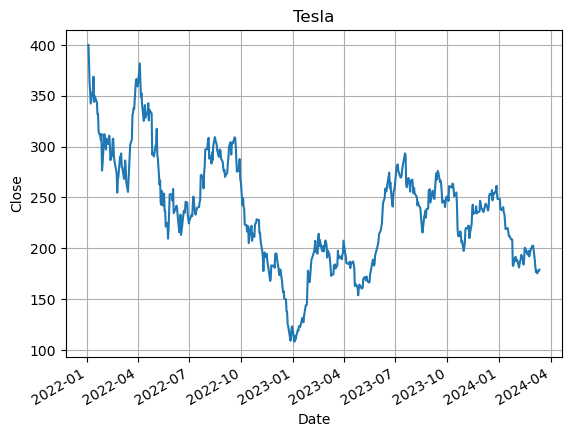

In [4]:
yfin.pdr_override()
tesla = pdr.get_data_yahoo ("TSLA",
                           start = '2022-1-1',
                           end = '2024-12-31')
close = tesla['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.grid()
plt.show()

In [5]:
tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400
2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300
2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800
2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700
...,...,...,...,...,...,...
2024-03-06,179.990005,181.580002,173.699997,176.539993,176.539993,107920900
2024-03-07,174.350006,180.039993,173.699997,178.649994,178.649994,102129000
2024-03-08,181.500000,182.729996,174.699997,175.339996,175.339996,85315300


In [6]:
yfin.pdr_override()
all_data={}
for ticker in ['AAPL','TSLA','GOOG']:
    all_data[ticker] = pdr.get_data_yahoo(ticker,
                                         start='2022-1-1',
                                          end='2024-1-31')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
all_data

{'AAPL':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2022-01-03  177.830002  182.880005  177.710007  182.009995  179.724564   
 2022-01-04  182.630005  182.940002  179.119995  179.699997  177.443573   
 2022-01-05  179.610001  180.169998  174.639999  174.919998  172.723587   
 2022-01-06  172.699997  175.300003  171.639999  172.000000  169.840271   
 2022-01-07  172.889999  174.139999  171.029999  172.169998  170.008118   
 ...                ...         ...         ...         ...         ...   
 2024-01-24  195.419998  196.380005  194.339996  194.500000  194.252121   
 2024-01-25  195.220001  196.270004  193.110001  194.169998  193.922546   
 2024-01-26  194.270004  194.759995  191.940002  192.419998  192.174774   
 2024-01-29  192.009995  192.199997  189.580002  191.729996  191.485657   
 2024-01-30  190.940002  191.800003  187.470001  188.039993  187.800354   
 
               

In [8]:
all_data['AAPL']['Adj Close']

Date
2022-01-03    179.724564
2022-01-04    177.443573
2022-01-05    172.723587
2022-01-06    169.840271
2022-01-07    170.008118
                 ...    
2024-01-24    194.252121
2024-01-25    193.922546
2024-01-26    192.174774
2024-01-29    191.485657
2024-01-30    187.800354
Name: Adj Close, Length: 521, dtype: float64

In [9]:
priceAPL = all_data['AAPL']['Adj Close']
priceAPL

Date
2022-01-03    179.724564
2022-01-04    177.443573
2022-01-05    172.723587
2022-01-06    169.840271
2022-01-07    170.008118
                 ...    
2024-01-24    194.252121
2024-01-25    193.922546
2024-01-26    192.174774
2024-01-29    191.485657
2024-01-30    187.800354
Name: Adj Close, Length: 521, dtype: float64

In [10]:
type(priceAPL)

pandas.core.series.Series

In [11]:
df = priceAPL.reset_index()
df

,Date,Adj Close
0,2022-01-03,179.724564
1,2022-01-04,177.443573
2,2022-01-05,172.723587
3,2022-01-06,169.840271
4,2022-01-07,170.008118
...,...,...
516,2024-01-24,194.252121
517,2024-01-25,193.922546
518,2024-01-26,192.174774
519,2024-01-29,191.485657


# TAREA (Martes 05 / marzo / 2024)
* Graficar la información anterior en un solo plot y analizarla.

### Ejemplo de Julian

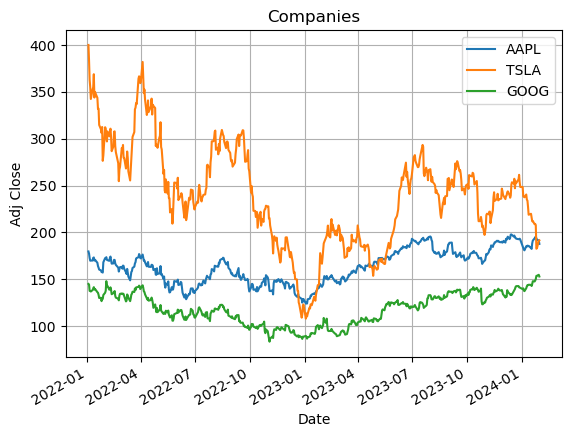

In [13]:
## Ejemplo de Julián
price = pd.DataFrame({i:data['Adj Close']
                     for i , data in all_data.items()})
volume = pd.DataFrame({i:data['Volume']
                      for i , data in all_data.items()})

ax = price.plot(title = 'Companies')
ax.set_xlabel('Date')
ax.set_ylabel('Adj Close')
ax.grid()
plt.show()

In [17]:
date = df['Date']
price = df['Adj Close']
dfDatePrice = pd.concat([date, price], axis = 1).rename(columns = {'Date': 'Date', 'Adj Close': 'Price'})
dfDatePrice

,Date,Price
0,2022-01-03,179.724564
1,2022-01-04,177.443558
2,2022-01-05,172.723587
3,2022-01-06,169.840240
4,2022-01-07,170.008118
...,...,...
516,2024-01-24,194.252121
517,2024-01-25,193.922546
518,2024-01-26,192.174774
519,2024-01-29,191.485657


In [24]:
# Now for all instances
#companies = ['AAPL','TSLA','GOOG']
#for i in companies:
price = pd.DataFrame({i:data['Adj Close'] for i, data in all_data.items()})
volume = pd.DataFrame({i:data['Volume'] for i, data in all_data.items()})

In [25]:
price

,AAPL,TSLA,GOOG
Date,,,
2022-01-03,179.724564,399.926666,145.074493
2022-01-04,177.443558,383.196655,144.416504
2022-01-05,172.723587,362.706665,137.653503
2022-01-06,169.840240,354.899994,137.550995
2022-01-07,170.008118,342.320007,137.004501
...,...,...,...
2024-01-24,194.252121,207.830002,150.350006
2024-01-25,193.922546,182.630005,153.639999
2024-01-26,192.174774,183.250000,153.789993


In [26]:
volume

,AAPL,TSLA,GOOG
Date,,,
2022-01-03,104487900,103931400,25214000
2022-01-04,99310400,100248300,22928000
2022-01-05,94537600,80119800,49642000
2022-01-06,96904000,90336600,29050000
2022-01-07,86709100,84164700,19408000
...,...,...,...
2024-01-24,53631300,123369900,19245000
2024-01-25,54822100,198076800,21495100
2024-01-26,44594000,107343200,19494500


In [27]:
returns = price.pct_change() #% changes of the prices (or differencies)

In [28]:
returns.tail()

,AAPL,TSLA,GOOG
Date,,,
2024-01-24,-0.003484,-0.006264,0.011232
2024-01-25,-0.001697,-0.121253,0.021882
2024-01-26,-0.009013,0.003395,0.000976
2024-01-29,-0.003586,0.041910,0.006828
2024-01-30,-0.019246,0.003457,-0.011560


In [29]:
returns.AAPL.corr(returns.TSLA)

0.5620052944251623

In [30]:
returns.AAPL.cov(returns.TSLA)

0.00038567025772562227

In [31]:
returns.corr()

,AAPL,TSLA,GOOG
AAPL,1.000000,0.562005,0.698342
TSLA,0.562005,1.000000,0.452818
GOOG,0.698342,0.452818,1.000000


In [32]:
returns.cov()

,AAPL,TSLA,GOOG
AAPL,0.000331,0.000386,0.000276
TSLA,0.000386,0.001423,0.000372
GOOG,0.000276,0.000372,0.000474


In [33]:
returns.corrwith(returns.TSLA)

AAPL    0.562005
TSLA    1.000000
GOOG    0.452818
dtype: float64

In [34]:
returns.corrwith(volume)

AAPL   -0.032848
TSLA    0.058740
GOOG   -0.056964
dtype: float64

## Unique values, value counts, and membership

In [14]:
data = pd.DataFrame({'One' : [1,2,3],
                    'Two' : [4, np.nan, 6],
                     'Three' :[7,8,9]
                     
})
data

,One,Two,Three
0,1,4.0,7
1,2,NaN,8
2,3,6.0,9


In [15]:
cleaned = data.dropna()
cleaned

,One,Two,Three
0,1,4.0,7
2,3,6.0,9


# Unique values, Value counts, and membership

In [5]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np

In [6]:
data = pd.DataFrame({'One' : [1,2,3],
                    'Two' : [4, np.nan, 6],
                    'Three' : [7,8,9]})
data

,One,Two,Three
0,1,4.0,7
1,2,NaN,8
2,3,6.0,9


In [7]:
cleaned = data.dropna()
cleaned

,One,Two,Three
0,1,4.0,7
2,3,6.0,9


In [8]:
data

,One,Two,Three
0,1,4.0,7
1,2,NaN,8
2,3,6.0,9


In [10]:
data['Two'] = np.nan
data

,One,Two,Three
0,1,NaN,7
1,2,NaN,8
2,3,NaN,9


In [11]:
data.dropna(axis=1)

,One,Three
0,1,7
1,2,8
2,3,9


In [12]:
df = pd.DataFrame(np.random.randn(4, 3))
df.iloc[:2, 1] = np.nan
df.iloc[:3, 2] = np.nan

In [13]:
df

,0,1,2
0,0.231659,NaN,NaN
1,0.904787,NaN,NaN
2,0.270731,-0.332593,NaN
3,-1.197053,-1.165259,0.725609


In [15]:
df.dropna(thresh = 3) #???

,0,1,2
2,0.270731,-0.332593,NaN
3,-1.197053,-1.165259,0.725609


In [16]:
df = pd.DataFrame(np.random.randn(4, 3))
df.iloc[:2, 1] = np.nan
df.iloc[:3, 2] = np.nan
df

,0,1,2
0,1.021375,NaN,NaN
1,0.268622,NaN,NaN
2,0.031011,1.844446,NaN
3,0.970581,-0.603114,-0.200554


In [17]:
df.fillna(0)

,0,1,2
0,1.021375,0.000000,0.000000
1,0.268622,0.000000,0.000000
2,0.031011,1.844446,0.000000
3,0.970581,-0.603114,-0.200554


In [18]:
df.fillna({1:-1.0,2: np.nan})

,0,1,2
0,1.021375,-1.000000,NaN
1,0.268622,-1.000000,NaN
2,0.031011,1.844446,NaN
3,0.970581,-0.603114,-0.200554


In [19]:
df.fillna(0, inplace = True)

In [20]:
df

,0,1,2
0,1.021375,0.000000,0.000000
1,0.268622,0.000000,0.000000
2,0.031011,1.844446,0.000000
3,0.970581,-0.603114,-0.200554


In [21]:
frame = pd.DataFrame(np.arange(12).reshape((4,3)),
                    index = [['a','a','b','b'], [1,2,1,2]],
                    columns = [['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [22]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state','color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [24]:
# Qué hueva, demasiados indices...

In [25]:
frame.swaplevel('key1','key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

#### Tarea: Eliminar los niveles de índices del ejercicio anterior (sugerencia: reindex())

## Data loading, storage and file format

In [2]:
import pandas as pd

In [3]:
#pd.read

In [4]:
df = pd.read_csv("/home/nesmv/Documentos/10mo Semestre/Analisis y ML/Datasets/titanic.csv")

In [5]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,4,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,5,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
df.head() #tail

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,4,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,5,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.tail(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


## JSON

In [15]:
data = """
{ "name" : "Wendy",
  "places_live" : ["US","Spain", "Germany"],
  "pet" : null,
  "siblings" : [ {"name": "Scott", "age" : 22, "pet": "Python"},
                 {"name": "Katie", "age" : 17, "pet": "Cisco"}
    ]
}
"""

In [10]:
import json

In [16]:
result = json.loads(data)
result

{'name': 'Wendy',
 'places_live': ['US', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 22, 'pet': 'Python'},
  {'name': 'Katie', 'age': 17, 'pet': 'Cisco'}]}

In [17]:
siblings = pd.DataFrame(result["siblings"], columns=['name', 'age'])
siblings

,name,age
0,Scott,22
1,Katie,17


## WebScraping

www.w3.org/DOM  <- Leer!



### Tarea: Realizar webscraping
* https://www.ny.gov/programs/open-ny

HTMLS Elements: https://es.wikipedia.org/wiki/Anexo:Elementos_HTML

In [21]:
from bs4 import BeautifulSoup
fname = 'nuevo.html'
soup = BeautifulSoup(open(fname), 'lxml')

In [22]:
soup

<!DOCTYPE html>
<html>
<head>
<title>page title</title>
</head>
<body>
<h1>My firstHeading</h1>
<p>My firstparagraph.</p>
</body>
</html>

In [23]:
soup.title

<title>page title</title>

In [24]:
soup.h1.contents

['My firstHeading']

In [25]:
soup.h1.text

'My firstHeading'

In [26]:
for i in soup.h1.stripped_strings:
    print(i)

My firstHeading


In [ ]:
from bs4 import BeautifulSoup

# Webscraping 
Blogs, foros, sitios oficiales de datos, etc. Función de recopilar esa información: coparación de precios, analísis de opinión sobre productos/servicios, chatbots, etc. No hay límite en cuanto creatividad de trabajar con la información. Existen sitios que tienen derechos de autor, habŕa que tener cuidado. Hay más sitios que tienen un concepto de datos libres: cada vez más organizaciones tienen secciones de datos (csv, txt, xslx, json).

Hay 3 formatos / fuentes de información:
* Paginas web pueden incluir: csv, json, xml, etc..
* API-REST: json, xml
* Páginas que contienen la información en formato "humano": Python tiene varias librerías:

1. Acceder por medio de una URL, descarga información y luego podemos utilizar desde python un paquete: BeautifulSoup
2. Si requiere utilizar un proceso en la información (extra) entonces se utiliza un paquete: Selenium (permite desde python hacer todo como si estuvieramos en el navegador).
3. Python: requests.

Resumiendo: 

* Archivos incluidos en la página web: requests, csv, json, etc.
* API-REST: requests.
* Datos incrustados en la página web (incluidos): BeautifulSoup
* Datos que requieren de proceso/interacción: Selenium

Archivos inlcuidos en la página web:
URI, URL, URN
URI (Uniform Resource Identifier): cadena de caracteres que identifica un recurso. Sintaxis general:
* Schema:[//[user[:passwd]@host[:port]][/path][?query][#tag]]
* https://es.wikipedia.org/wiki/Pandemia_de_COVID-19
* https://es.wikipedia.org/wiki/Pandemia_de_COVID-19#Am%C3%A9rica
* https://www.youtube.com/watch?v=183lwSzCgV4

URI se divide en dos partes: URL y URN URL (uniform resource locator) direcciones en la wwww
ftp://teclaguna.edu.mx

URN (uniform resource name) urn:isbn:0451450523

In [1]:
#Archivos incluidos en la página web

import requests
url = "https://www.gutenberg.org/ebooks/1112.txt.utf-8"
resp = requests.get(url)
print(resp) #https://www.w3.org/Protocols/rfc2616/rfc2616-sec10.html <- codigos de respuesta html

<Response [200]>


In [2]:
print(resp.content)

b"\xef\xbb\xbfThe Project Gutenberg eBook of The Tragedy of Romeo and Juliet\r\n    \r\nThis ebook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this ebook or online\r\nat www.gutenberg.org. If you are not located in the United States,\r\nyou will have to check the laws of the country where you are located\r\nbefore using this eBook.\r\n\r\nTitle: The Tragedy of Romeo and Juliet\r\n\r\n\r\nAuthor: William Shakespeare\r\n\r\nRelease date: November 1, 1997 [eBook #1112]\r\n                Most recently updated: November 3, 2023\r\n\r\nLanguage: English\r\n\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK THE TRAGEDY OF ROMEO AND JULIET ***\r\n\r\n\r\n\r\n\r\nThe Tragedie of Romeo and Juliet\r\n\r\nActus Primus. Scoena Prima.\r\n\r\nEnter Sampson and Gregory, with Swords and B

In [3]:
type(resp)

requests.models.Response

In [4]:
path = "/home/nesmv/Documentos/10mo Semestre/Analisis y ML" #/bigdata/
with open(path + "ryj.txt", "wb") as arch:
    arch.write(resp.content)

In [8]:
import urllib.request
signos = ",*./#[] "
cuenta = 0
pal = [] #Lista
with urllib.request.urlopen("http://www.gutenberg.org/ebooks/1112.txt.utf-8") as info:
    for linea in info.readlines():
        limpia = linea.decode("utf-8").lower()
        for s in signos:
            limpia = limpia.replace(s, " ")
            #cuenta = cuenta + 1
            #extend append en la lista
        pal.extend(limpia.split())
            #print(pal)
#print(cuenta)
print(len(pal))
#print(pal)

28343


In [ ]:
pal[2]

In [9]:
# Otra manera expresiones regulares:
apellido = ("capulet", "montague") #Montesco
nombres = ("romeo", "juliet", "tybalt", "mercutio")

In [10]:
ap = {a: pal.count(a) for a in apellido}
no = {n: pal.count(n) for n in nombres}

In [11]:
print(ap)
print(no)

{'capulet': 20, 'montague': 1}
{'romeo': 131, 'juliet': 5, 'tybalt': 38, 'mercutio': 17}


In [12]:
ap.keys()

dict_keys(['capulet', 'montague'])

In [13]:
ap.values()

dict_values([20, 1])

In [14]:
# Toca graficar
import matplotlib.pyplot as plt

In [15]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Text(0.5, 1.0, 'Frecuencia de familia rivales')

<Figure size 640x480 with 0 Axes>

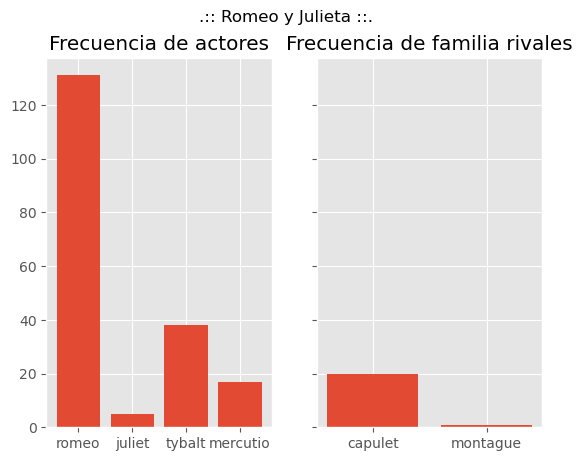

In [17]:
# Estilo
plt.style.use("ggplot") # Classic ggplot
#Crear una figura
fig = plt.figure()
fig, axes = plt.subplots(1, 2, sharey = True)
fig.suptitle(".:: Romeo y Julieta ::.")
plt.sca(axes[0]) # Activamos el plot
#plt.xticks(rotation=45) # rotar las llaves
axes[0].bar(no.keys(), no.values())
axes[0].set_title("Frecuencia de actores")
axes[1].bar(ap.keys(), ap.values())
axes[1].set_title("Frecuencia de familia rivales")

In [1]:
# Tiempo real: Calidad del aire <<madrid>>
# Formato de archivo:
# Columnas 0,1,2: Estación meterológica
# Columnas 3,4,5: Valor medido.
# Columna 3: oxido de nitrógeno 12
# Columna 6,7,8: año, mes, día
# Columnas 9-56 datos específicos de la calidad del aire pero están en pares:
# Valor (hora), verificación V Ok, N -no validado
url = "https://www.mambiente.madrid.es/opendata/horario.txt"
import requests
resp = requests.get(url)
print(resp)

<Response [200]>


In [2]:
path = "/home/nesmv/Documentos/10mo Semestre/Analisis y ML"
with open(path + "horario.txt", "wb") as arch:
    arch.write(resp.content)

/tmp/ipykernel_4860/2994273877.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


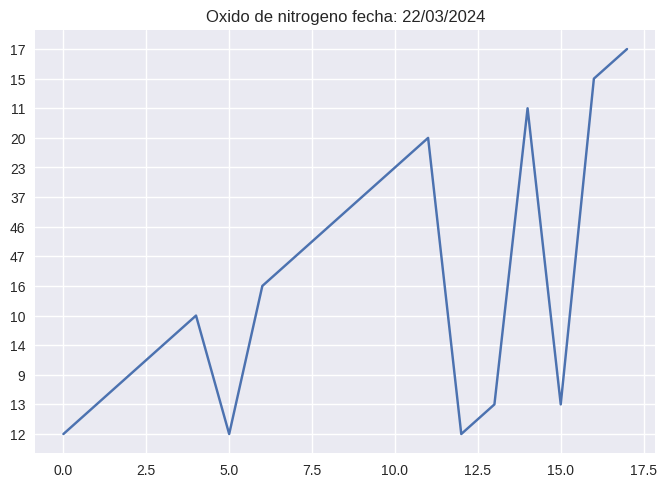

In [3]:
import matplotlib.pyplot as plt
import csv
plt.style.use("seaborn")
with open (path+"horario.txt") as arch:
    lector = csv.reader(arch, delimiter = ",")
    for linea in lector:
        if linea[3] == "12":
            hora = 0
            col = 9
            lista = [] # Datos de ON NO2
            horas = [] # Horario
            while hora <= 23:
                if linea[col+2*hora+1] == "V": # V = valido, N = No valido
                    lista.append(linea[col+2*hora])
                    horas.append(hora)
                hora = hora + 1
plt.title("Oxido de nitrogeno fecha: "+ linea[8]+"/"
         + linea[7] + "/" + linea[6])
plt.plot(horas, lista)
plt.show()

In [23]:
import urllib.request
import bs4

In [24]:
pagina = urllib.request.urlopen('http://www.itlalaguna.edu.mx')
html = pagina.read()
# BeautifulSoup es una biblioteca que ayuda a analizar datos en archivos html
sopa = bs4.BeautifulSoup(html, 'html.parser') # 'html5lib'

In [25]:
type(html)

bytes

In [26]:
type(sopa)

bs4.BeautifulSoup

In [27]:
sopa

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Global site tag (gtag.js) - Google Analytics urbilily =UA-54252992-1 solo www-->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-54252992-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-54252992-1');
</script>
<script crossorigin="anonymous" integrity="sha256-9/aliU8dGd2tb6OSsuzixeV4y/faTqgFtohetphbbj0=" src="https://code.jquery.com/jquery-3.5.1.min.js"></script>
<!-- Global site tag (gtag.js) - Google Analytics itlsitioweb UA-180691430-1  dominio itlalaguna.edu.mx -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-180691430-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-180691430-1');
</script>
<!-- Global site tag (gtag.js) - Google Analytics G-JTN8QDY5L0 lalaguna.tecnm.mx 

In [29]:
sopa.title.text

'Instituto Tecnológico de La Laguna'

In [31]:
sopa.body.text

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n (current)\n\n\n\n\n Gobierno\n\n\nParticipa\n\n\nDatos\n\n\n\nBúsqueda\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\r\n                    Directorio\r\n                \n\n\n\n\r\n                    Conócenos\r\n                \n\nHISTORIA\nMISIÓN Y VISIÓN\nUBICACIÓN E INFRAESCTRUCTURA\nCUIDADO DEL MEDIO AMBIENTE\nMASCOTA Y LOGOS\n\n\nBUZÓN DE QUEJAS Y SUGERENCIAS\n\r\n                        FORMATO DE DENUNCIAS DEL SG DE\r\n                        IGUALDAD DE GÉNERO Y NO DISCRIMINACIÓN\nCÓDIGO DE ÉTICA Y CONDUCTA\nNORMATECA  DEL TECNM\n\n\n\n\n\n\n\r\n                    Oferta Educativa\r\n                \n\n\n\nNIVEL LICENCIATURA\n\nING. SISTEMAS\r\n                                    COMPUTACIONALES\nING. ELÉCTRICA\nING. ELECTRÓNICA\nING. EN ENERGÍAS\r\n                                    RENOVABLES\nING.\r\n                                    INDUSTRIAL\nING. MEC

In [32]:
lista = sopa.body.select('div')

In [33]:
lista

[<div class="collapse navbar-collapse" id="navbarNav">
 <ul class="navbar-nav mr-auto">
 <li class="nav-item active">
 <a class="nav-link" href="#"> <span class="sr-only">(current)</span></a>
 </li>
 </ul>
 <ul class="navbar-nav" style="margin-right: 10%;">
 <li class="nav-item">
 <a class="nav-link" href="https://www.gob.mx/gobierno" style="color: white;"> Gobierno</a>
 </li>
 <li class="nav-item">
 <a class="nav-link" href="https://www.gob.mx/participa" style="color: white;">Participa</a>
 </li>
 <li class="nav-item">
 <a class="nav-link" href="https://datos.gob.mx " style="color: white;">Datos</a>
 </li>
 <li class="nav-item">
 <a class="nav-item nav-link active" href="https://www.gob.mx/busqueda" style="color: white;">
 <span class="sr-only">Búsqueda</span>
 <svg aria-hidden="true" class="svg-inline--fa fa-search fa-w-16" data-fa-i2svg="" data-icon="search" data-prefix="fas" focusable="false" height="18" role="img" viewbox="0 0 512 512" width="18" xmlns="http://www.w3.org/2000/svg"

In [34]:
len(lista)

46

In [35]:
lista[0] 

<div class="collapse navbar-collapse" id="navbarNav">
<ul class="navbar-nav mr-auto">
<li class="nav-item active">
<a class="nav-link" href="#"> <span class="sr-only">(current)</span></a>
</li>
</ul>
<ul class="navbar-nav" style="margin-right: 10%;">
<li class="nav-item">
<a class="nav-link" href="https://www.gob.mx/gobierno" style="color: white;"> Gobierno</a>
</li>
<li class="nav-item">
<a class="nav-link" href="https://www.gob.mx/participa" style="color: white;">Participa</a>
</li>
<li class="nav-item">
<a class="nav-link" href="https://datos.gob.mx " style="color: white;">Datos</a>
</li>
<li class="nav-item">
<a class="nav-item nav-link active" href="https://www.gob.mx/busqueda" style="color: white;">
<span class="sr-only">Búsqueda</span>
<svg aria-hidden="true" class="svg-inline--fa fa-search fa-w-16" data-fa-i2svg="" data-icon="search" data-prefix="fas" focusable="false" height="18" role="img" viewbox="0 0 512 512" width="18" xmlns="http://www.w3.org/2000/svg">
<path d="M505 442.

In [37]:
nueva = [e for e in lista]
nueva

[<div class="collapse navbar-collapse" id="navbarNav">
 <ul class="navbar-nav mr-auto">
 <li class="nav-item active">
 <a class="nav-link" href="#"> <span class="sr-only">(current)</span></a>
 </li>
 </ul>
 <ul class="navbar-nav" style="margin-right: 10%;">
 <li class="nav-item">
 <a class="nav-link" href="https://www.gob.mx/gobierno" style="color: white;"> Gobierno</a>
 </li>
 <li class="nav-item">
 <a class="nav-link" href="https://www.gob.mx/participa" style="color: white;">Participa</a>
 </li>
 <li class="nav-item">
 <a class="nav-link" href="https://datos.gob.mx " style="color: white;">Datos</a>
 </li>
 <li class="nav-item">
 <a class="nav-item nav-link active" href="https://www.gob.mx/busqueda" style="color: white;">
 <span class="sr-only">Búsqueda</span>
 <svg aria-hidden="true" class="svg-inline--fa fa-search fa-w-16" data-fa-i2svg="" data-icon="search" data-prefix="fas" focusable="false" height="18" role="img" viewbox="0 0 512 512" width="18" xmlns="http://www.w3.org/2000/svg"

In [38]:
sopa.find_all('div')

[<div class="collapse navbar-collapse" id="navbarNav">
 <ul class="navbar-nav mr-auto">
 <li class="nav-item active">
 <a class="nav-link" href="#"> <span class="sr-only">(current)</span></a>
 </li>
 </ul>
 <ul class="navbar-nav" style="margin-right: 10%;">
 <li class="nav-item">
 <a class="nav-link" href="https://www.gob.mx/gobierno" style="color: white;"> Gobierno</a>
 </li>
 <li class="nav-item">
 <a class="nav-link" href="https://www.gob.mx/participa" style="color: white;">Participa</a>
 </li>
 <li class="nav-item">
 <a class="nav-link" href="https://datos.gob.mx " style="color: white;">Datos</a>
 </li>
 <li class="nav-item">
 <a class="nav-item nav-link active" href="https://www.gob.mx/busqueda" style="color: white;">
 <span class="sr-only">Búsqueda</span>
 <svg aria-hidden="true" class="svg-inline--fa fa-search fa-w-16" data-fa-i2svg="" data-icon="search" data-prefix="fas" focusable="false" height="18" role="img" viewbox="0 0 512 512" width="18" xmlns="http://www.w3.org/2000/svg"

In [39]:
sopa.find_all("img")

[<img alt="Página de inicio, Gobierno de México" height="33" src="https://framework-gb.cdn.gob.mx/landing/img/logoheader.svg" style=" margin-left: 80%;"/>,
 <img alt="Gobierno de México" src="img/logotipos/pleca-gob1.png" style="width:30%;height:auto"/>,
 <img alt="Educación" src="img/logotipos/pleca-gob2.png" style="width:30%;height:auto; min-width:auto;"/>,
 <img alt="TecNM" src="img/logotipos/pleca_tecnm.jpg" style="width:18%;height:auto; "/>,
 <img alt="ITL" src="img/logotipos/itl2.jpeg" style="width:7%; height:auto;"/>,
 <img alt="Inglés" src="img/logotipos/usa-icono.png" style="width:20%; height:auto; display:inline-block" title="Inglés"/>,
 <img alt="Español" src="img/logotipos/mexico-icono.png" style="width:20%; height:auto; display:inline-block" title="Español"/>,
 <img alt="Francés" src="img/logotipos/francia-icono.png" style="width:20%; height:auto; display:inline-block" title="Francés"/>,
 <img alt="Alemán" src="img/logotipos/alemania-icono.png" style="width:20%; height:aut

In [4]:
# Página del clima

import requests
from bs4 import BeautifulSoup
pagina = requests.get("https://forecast.weather.gov/MapClick.php?lat=29.633&lon=-95.6007#.X5c-IohKhPZ")
soup = BeautifulSoup(pagina.content, "html.parser")#html5lib
dias = soup.find(id = "seven-day-forecast")
forecast_items = dias.find_all(class_="tombstone-container")
actual = forecast_items[0]
print(actual.prettify())

<div class="tombstone-container">
 <p class="period-name">
  This
  <br/>
  Afternoon
 </p>
 <p>
  <img alt="This Afternoon: Mostly sunny, with a high near 77. Northwest wind 10 to 15 mph, with gusts as high as 20 mph. " class="forecast-icon" src="newimages/medium/sct.png" title="This Afternoon: Mostly sunny, with a high near 77. Northwest wind 10 to 15 mph, with gusts as high as 20 mph. "/>
 </p>
 <p class="short-desc">
  Mostly Sunny
 </p>
 <p class="temp temp-high">
  High: 77 °F
 </p>
</div>


In [5]:
forecast_items
# Nombre del item: Hoy
# Condiciones
# Temperatura

[<div class="tombstone-container">
 <p class="period-name">This<br/>Afternoon</p>
 <p><img alt="This Afternoon: Mostly sunny, with a high near 77. Northwest wind 10 to 15 mph, with gusts as high as 20 mph. " class="forecast-icon" src="newimages/medium/sct.png" title="This Afternoon: Mostly sunny, with a high near 77. Northwest wind 10 to 15 mph, with gusts as high as 20 mph. "/></p><p class="short-desc">Mostly Sunny</p><p class="temp temp-high">High: 77 °F</p></div>,
 <div class="tombstone-container">
 <p class="period-name">Tonight<br/><br/></p>
 <p><img alt="Tonight: Mostly clear, with a low around 56. North wind 10 to 15 mph, with gusts as high as 20 mph. " class="forecast-icon" src="newimages/medium/nfew.png" title="Tonight: Mostly clear, with a low around 56. North wind 10 to 15 mph, with gusts as high as 20 mph. "/></p><p class="short-desc">Mostly Clear</p><p class="temp temp-low">Low: 56 °F</p></div>,
 <div class="tombstone-container">
 <p class="period-name">Saturday<br/><br/><

In [10]:
#Extracción de la información
hoy = actual.find(class_="period-name").get_text()
descripcion = actual.find(class_="short-desc").get_text()
temp = actual.find(class_="temp").get_text()
print(hoy)
print(descripcion)
print(temp)

ThisAfternoon
Mostly Sunny
High: 77 °F


In [11]:
dias

<div class="panel panel-default" id="seven-day-forecast">
<div class="panel-heading">
<b>Extended Forecast for</b>
<h2 class="panel-title">
                Sugar Land TX    </h2>
</div>
<div class="panel-body" id="seven-day-forecast-body">
<div id="seven-day-forecast-container"><ul class="list-unstyled" id="seven-day-forecast-list"><li class="forecast-tombstone">
<div class="tombstone-container">
<p class="period-name">This<br/>Afternoon</p>
<p><img alt="This Afternoon: Mostly sunny, with a high near 77. Northwest wind 10 to 15 mph, with gusts as high as 20 mph. " class="forecast-icon" src="newimages/medium/sct.png" title="This Afternoon: Mostly sunny, with a high near 77. Northwest wind 10 to 15 mph, with gusts as high as 20 mph. "/></p><p class="short-desc">Mostly Sunny</p><p class="temp temp-high">High: 77 °F</p></div></li><li class="forecast-tombstone">
<div class="tombstone-container">
<p class="period-name">Tonight<br/><br/></p>
<p><img alt="Tonight: Mostly clear, with a low arou

In [12]:
# POdemos traernos la descripcion de la imagen
imagenHOY = actual.find("img")
describe = imagenHOY["title"]
print(describe)

This Afternoon: Mostly sunny, with a high near 77. Northwest wind 10 to 15 mph, with gusts as high as 20 mph. 


In [13]:
print(imagenHOY)

<img alt="This Afternoon: Mostly sunny, with a high near 77. Northwest wind 10 to 15 mph, with gusts as high as 20 mph. " class="forecast-icon" src="newimages/medium/sct.png" title="This Afternoon: Mostly sunny, with a high near 77. Northwest wind 10 to 15 mph, with gusts as high as 20 mph. "/>


In [16]:
tags = dias.select(".tombstone-container .period-name")
semana = [i.get_text() for i in tags]
semana

['ThisAfternoon',
 'Tonight',
 'Saturday',
 'SaturdayNight',
 'Sunday',
 'SundayNight',
 'Monday',
 'MondayNight',
 'Tuesday']

In [17]:
tags

[<p class="period-name">This<br/>Afternoon</p>,
 <p class="period-name">Tonight<br/><br/></p>,
 <p class="period-name">Saturday<br/><br/></p>,
 <p class="period-name">Saturday<br/>Night</p>,
 <p class="period-name">Sunday<br/><br/></p>,
 <p class="period-name">Sunday<br/>Night</p>,
 <p class="period-name">Monday<br/><br/></p>,
 <p class="period-name">Monday<br/>Night</p>,
 <p class="period-name">Tuesday<br/><br/></p>]

In [25]:
descripciones = [d.get_text() for d in dias.select(".tombstone-container .short-desc")]
temps = [t.get_text()
         for t in dias.select(".tombstone-container .temp")]
Ddescripciones = [d["title"]
                 for d in dias.select(".tombstone-container img")]
print(descripciones)
print(temps)
print(Ddescripciones)

['Mostly Sunny', 'Mostly Clear', 'Mostly Sunny', 'Partly Cloudy', 'Partly Sunnythen MostlyCloudy andBreezy', 'Mostly Cloudy', 'ChanceT-storms', 'ChanceT-storms', 'Mostly Sunny']
['High: 77 °F', 'Low: 56 °F', 'High: 79 °F', 'Low: 58 °F', 'High: 77 °F', 'Low: 67 °F', 'High: 78 °F', 'Low: 57 °F', 'High: 72 °F']
['This Afternoon: Mostly sunny, with a high near 77. Northwest wind 10 to 15 mph, with gusts as high as 20 mph. ', 'Tonight: Mostly clear, with a low around 56. North wind 10 to 15 mph, with gusts as high as 20 mph. ', 'Saturday: Mostly sunny, with a high near 79. North wind 5 to 10 mph. ', 'Saturday Night: Partly cloudy, with a low around 58. Southeast wind around 5 mph. ', 'Sunday: Partly sunny, with a high near 77. Breezy, with a south wind 10 to 15 mph increasing to 15 to 20 mph in the afternoon. Winds could gust as high as 30 mph. ', 'Sunday Night: Mostly cloudy, with a low around 67.', 'Monday: A 50 percent chance of showers and thunderstorms.  Mostly cloudy, with a high near

In [26]:
# Utilizando Pandas
import pandas as pd
pronostico = pd.DataFrame({"Dia":semana,
                          "Descripcion":descripciones,
                          "Temperatura":temps,
                          "Detalle":Ddescripciones})
pronostico

,Dia,Descripcion,Temperatura,Detalle
0,ThisAfternoon,Mostly Sunny,High: 77 °F,"This Afternoon: Mostly sunny, with a high near..."
1,Tonight,Mostly Clear,Low: 56 °F,"Tonight: Mostly clear, with a low around 56. N..."
2,Saturday,Mostly Sunny,High: 79 °F,"Saturday: Mostly sunny, with a high near 79. N..."
3,SaturdayNight,Partly Cloudy,Low: 58 °F,"Saturday Night: Partly cloudy, with a low arou..."
4,Sunday,Partly Sunnythen MostlyCloudy andBreezy,High: 77 °F,"Sunday: Partly sunny, with a high near 77. Bre..."
5,SundayNight,Mostly Cloudy,Low: 67 °F,"Sunday Night: Mostly cloudy, with a low around..."
6,Monday,ChanceT-storms,High: 78 °F,Monday: A 50 percent chance of showers and thu...
7,MondayNight,ChanceT-storms,Low: 57 °F,Monday Night: A 30 percent chance of showers a...
8,Tuesday,Mostly Sunny,High: 72 °F,"Tuesday: Mostly sunny, with a high near 72."


In [32]:
#Utilizando series
solo_temp = pronostico["Temperatura"].str.extract("(?P<temp_num>\d+)", expand = False)
pronostico["temp_num"] = solo_temp.astype('int') # Convierto a int y agregar
solo_temp

0    77
1    56
2    79
3    58
4    77
5    67
6    78
7    57
8    72
Name: temp_num, dtype: object

In [33]:
pronostico

,Dia,Descripcion,Temperatura,Detalle,temp_num
0,ThisAfternoon,Mostly Sunny,High: 77 °F,"This Afternoon: Mostly sunny, with a high near...",77
1,Tonight,Mostly Clear,Low: 56 °F,"Tonight: Mostly clear, with a low around 56. N...",56
2,Saturday,Mostly Sunny,High: 79 °F,"Saturday: Mostly sunny, with a high near 79. N...",79
3,SaturdayNight,Partly Cloudy,Low: 58 °F,"Saturday Night: Partly cloudy, with a low arou...",58
4,Sunday,Partly Sunnythen MostlyCloudy andBreezy,High: 77 °F,"Sunday: Partly sunny, with a high near 77. Bre...",77
5,SundayNight,Mostly Cloudy,Low: 67 °F,"Sunday Night: Mostly cloudy, with a low around...",67
6,Monday,ChanceT-storms,High: 78 °F,Monday: A 50 percent chance of showers and thu...,78
7,MondayNight,ChanceT-storms,Low: 57 °F,Monday Night: A 30 percent chance of showers a...,57
8,Tuesday,Mostly Sunny,High: 72 °F,"Tuesday: Mostly sunny, with a high near 72.",72


In [34]:
pronostico["temp_num"].mean()

69.0

In [35]:
#Los dias que en la noche tengan esa temperatura o estén en el rango de esa temperatura
noche = pronostico["Temperatura"].str.contains("Low") #Noche
pronostico["noche"] = noche
noche

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7     True
8    False
Name: Temperatura, dtype: bool

In [36]:
pronostico

,Dia,Descripcion,Temperatura,Detalle,temp_num,noche
0,ThisAfternoon,Mostly Sunny,High: 77 °F,"This Afternoon: Mostly sunny, with a high near...",77,False
1,Tonight,Mostly Clear,Low: 56 °F,"Tonight: Mostly clear, with a low around 56. N...",56,True
2,Saturday,Mostly Sunny,High: 79 °F,"Saturday: Mostly sunny, with a high near 79. N...",79,False
3,SaturdayNight,Partly Cloudy,Low: 58 °F,"Saturday Night: Partly cloudy, with a low arou...",58,True
4,Sunday,Partly Sunnythen MostlyCloudy andBreezy,High: 77 °F,"Sunday: Partly sunny, with a high near 77. Bre...",77,False
5,SundayNight,Mostly Cloudy,Low: 67 °F,"Sunday Night: Mostly cloudy, with a low around...",67,True
6,Monday,ChanceT-storms,High: 78 °F,Monday: A 50 percent chance of showers and thu...,78,False
7,MondayNight,ChanceT-storms,Low: 57 °F,Monday Night: A 30 percent chance of showers a...,57,True
8,Tuesday,Mostly Sunny,High: 72 °F,"Tuesday: Mostly sunny, with a high near 72.",72,False


In [37]:
pronostico[noche]

,Dia,Descripcion,Temperatura,Detalle,temp_num,noche
1,Tonight,Mostly Clear,Low: 56 °F,"Tonight: Mostly clear, with a low around 56. N...",56,True
3,SaturdayNight,Partly Cloudy,Low: 58 °F,"Saturday Night: Partly cloudy, with a low arou...",58,True
5,SundayNight,Mostly Cloudy,Low: 67 °F,"Sunday Night: Mostly cloudy, with a low around...",67,True
7,MondayNight,ChanceT-storms,Low: 57 °F,Monday Night: A 30 percent chance of showers a...,57,True


In [ ]:
from selenium import webdriver

In [ ]:
webdriver